# Temporal correlation analysis between discrete point events and times eries data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

import os, sys

cwd = os.getcwd()
frameworkDir = os.path.abspath(os.path.join(cwd, os.pardir, 'src'))
sys.path.append(frameworkDir)

from dackar.utils.num import t_score

np.random.seed(6)

## Generate example time series

In [3]:
def generateSeries(maxT, t1, t2, tsql, sqlDur):
    N  = 5000
    N_spk = 7

    cpu        = np.zeros(N)
    t          = np.linspace(0,maxT,N)
    noise_base = np.random.normal(0,0.005,N)

    spikesLoc = np.random.randint(low=0, high=N, size=N_spk)
    spikesDT  = np.random.randint(low=10, high=20, size=N_spk)
    
    difference_array_1 = np.absolute(t-t1)
    index1 = difference_array_1.argmin()

    difference_array_2 = np.absolute(t-t2)
    index2 = difference_array_2.argmin()
    
    cpu[0:index1] = .3
    cpu[index2:N] = .3
    cpu[index1:index2] = .9
    cpu = cpu + noise_base
    
    # random spikes
    for i in range(N_spk):
        noise_spike = np.absolute(np.random.normal(0,0.04, spikesDT[i]))
        for dt in range(spikesDT[i]):
            cpu[spikesLoc[i] + dt] = cpu[spikesLoc[i] + dt] + noise_spike[dt]
            
    # SQL spikes
    noiseSQL = np.absolute(np.random.normal(0,0.08, sqlDur))
    for dt in range(sqlDur):
        cpu[tsql + dt] = cpu[tsql + dt] + noiseSQL[dt]

    print('Anomaly ratio: total', (index2-index1 + np.sum(spikesDT[i]))/N)
    print('Anomaly ratio: large spikes:', (index2-index1)/N)
    print('Anomaly ratio: small spikes', (np.sum(spikesDT[i]))/N)
        
    return t,cpu

## Generate temporal location of a set of events
True positive events:
* E1: located right before rump-up
* E2: located right after rump-up
* E3: located right before rump-down
* E4: located right after rump-down
* E5: located in the middle of squared pulse
True negative events:
* EA: located before the squared pulse 
* EB: located after the squared pulse 
* EC: located after the squared pulse 

In [ ]:
maxT = 1000
t1 = 300
t2 = 370
tsql   = 650
sqlDur = 50
t, cpu = generateSeries(maxT, t1, t2, tsql, sqlDur)

difference_array_1 = np.absolute(t-t1)
loc1 = difference_array_1.argmin()
difference_array_2 = np.absolute(t-t2)
loc2 = difference_array_2.argmin()

# True negative
E1_loc = loc1 - 10
E2_loc = loc1 + 10
E3_loc = loc2 - 10
E4_loc = loc2 + 10
E5_loc = loc1 + 35

# True positive
EA = 200
difference_array_0 = np.absolute(t-EA)
EA_loc = difference_array_0.argmin()

EB = 500
difference_array_0 = np.absolute(t-EB)
EB_loc = difference_array_0.argmin()

EC = 900
difference_array_0 = np.absolute(t-EC)
EC_loc = difference_array_0.argmin()

Anomaly ratio: total 0.0736
Anomaly ratio: large spikes: 0.07
Anomaly ratio: small spikes 0.0036


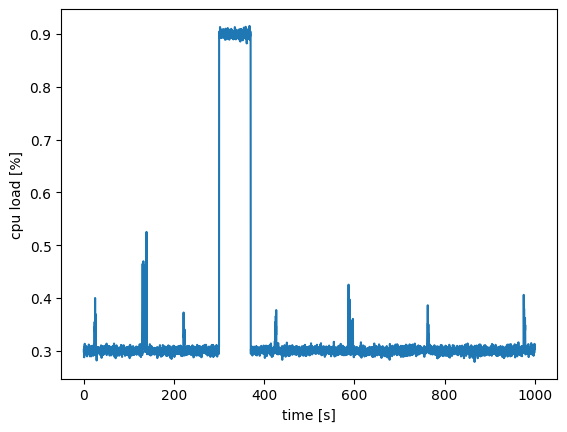

In [4]:
plt.close()
fig, ax = plt.subplots()
ax.plot(t,cpu)

plt.xlabel('time [s]')
plt.ylabel('cpu load [%]')
plt.show()

In [5]:
windowSize = 100
omegaSize = 500
alpha = 0.05
N_iterations = 100
alpha_value = 0.0736

In [6]:
t_score.event2TStest(E_loc=E1_loc, TS=cpu, iterations=N_iterations, alphaTest=alpha, alphaOmegaset=alpha_value, windowSize=windowSize, omegaSize=omegaSize)

Computing statitics for Lfront vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.732, which is greater than given test value 0.0736
Correlated? False p value: 0.732

Computing statistics for Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.010000000000000009, which is smaller than given test value 0.0736
Correlated? True p value: 0.010000000000000009

Computing statitics for Lfront vs. Lrear
The p-value is: 0.01, which is less than the significant level: 0.05
Correlated? True p value: 0.01

Computing statitics for Lfront u Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.02200000000000002, which is smaller than given test value 0.0736
Correlated? True p value: 0.02200000000000002
Identified relation:  E --> S


'E --> S'

In [7]:
t_score.event2TStest(E_loc=E2_loc, TS=cpu, iterations=N_iterations, alphaTest=alpha, alphaOmegaset=alpha_value, windowSize=windowSize, omegaSize=omegaSize)

Computing statitics for Lfront vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.010000000000000009, which is smaller than given test value 0.0736
Correlated? True p value: 0.010000000000000009

Computing statistics for Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.04400000000000004, which is smaller than given test value 0.0736
Correlated? True p value: 0.04400000000000004

Computing statitics for Lfront vs. Lrear
The p-value is: 0.01, which is less than the significant level: 0.05
Correlated? True p value: 0.01

Computing statitics for Lfront u Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.006000000000000005, which is smaller than given test value 0.0736
Correlated? True p value: 0.006000000000000005
Identified relation:  S -->* E


'S -->* E'

In [8]:
t_score.event2TStest(E_loc=E3_loc, TS=cpu, iterations=N_iterations, alphaTest=alpha, alphaOmegaset=alpha_value, windowSize=windowSize, omegaSize=omegaSize)

Computing statitics for Lfront vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.052000000000000046, which is smaller than given test value 0.0736
Correlated? True p value: 0.052000000000000046

Computing statistics for Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.01200000000000001, which is smaller than given test value 0.0736
Correlated? True p value: 0.01200000000000001

Computing statitics for Lfront vs. Lrear
The p-value is: 0.01, which is less than the significant level: 0.05
Correlated? True p value: 0.01

Computing statitics for Lfront u Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.020000000000000018, which is smaller than given test value 0.0736
Correlated? True p value: 0.020000000000000018
Identified relation:  E -->* S


'E -->* S'

In [9]:
t_score.event2TStest(E_loc=E4_loc, TS=cpu, iterations=N_iterations, alphaTest=alpha, alphaOmegaset=alpha_value, windowSize=windowSize, omegaSize=omegaSize)

Computing statitics for Lfront vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.008000000000000007, which is smaller than given test value 0.0736
Correlated? True p value: 0.008000000000000007

Computing statistics for Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.756, which is greater than given test value 0.0736
Correlated? False p value: 0.756

Computing statitics for Lfront vs. Lrear
The p-value is: 0.01, which is less than the significant level: 0.05
Correlated? True p value: 0.01

Computing statitics for Lfront u Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.014000000000000012, which is smaller than given test value 0.0736
Correlated? True p value: 0.014000000000000012
Identified relation:  S --> E


'S --> E'

In [10]:
t_score.event2TStest(E_loc=E5_loc, TS=cpu, iterations=N_iterations, alphaTest=alpha, alphaOmegaset=alpha_value, windowSize=windowSize, omegaSize=omegaSize)

Computing statitics for Lfront vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.014000000000000012, which is smaller than given test value 0.0736
Correlated? True p value: 0.014000000000000012

Computing statistics for Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.05800000000000005, which is smaller than given test value 0.0736
Correlated? True p value: 0.05800000000000005

Computing statitics for Lfront vs. Lrear
The p-value is: 0.01, which is less than the significant level: 0.05
Correlated? True p value: 0.01

Computing statitics for Lfront u Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.0, which is smaller than given test value 0.0736
Correlated? True p value: 0.0
Identified relation:  S -->* E


'S -->* E'

In [11]:
t_score.event2TStest(E_loc=EA_loc, TS=cpu, iterations=N_iterations, alphaTest=alpha, alphaOmegaset=alpha_value, windowSize=windowSize, omegaSize=omegaSize)

Computing statitics for Lfront vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.77, which is greater than given test value 0.0736
Correlated? False p value: 0.77

Computing statistics for Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.772, which is greater than given test value 0.0736
Correlated? False p value: 0.772

Computing statitics for Lfront vs. Lrear
The p-value is: 0.68, which is larger than the significant level: 0.05
Correlated? False p value: 0.68

Computing statitics for Lfront u Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.764, which is greater than given test value 0.0736
Correlated? False p value: 0.764
Identified relation:  S!E


'S!E'

In [12]:
t_score.event2TStest(E_loc=EB_loc, TS=cpu, iterations=N_iterations, alphaTest=alpha, alphaOmegaset=alpha_value, windowSize=windowSize, omegaSize=omegaSize)

Computing statitics for Lfront vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.728, which is greater than given test value 0.0736
Correlated? False p value: 0.728

Computing statistics for Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.716, which is greater than given test value 0.0736
Correlated? False p value: 0.716

Computing statitics for Lfront vs. Lrear
The p-value is: 0.55, which is larger than the significant level: 0.05
Correlated? False p value: 0.55

Computing statitics for Lfront u Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.72, which is greater than given test value 0.0736
Correlated? False p value: 0.72
Identified relation:  S!E


'S!E'

In [13]:
t_score.event2TStest(E_loc=EC_loc, TS=cpu, iterations=N_iterations, alphaTest=alpha, alphaOmegaset=alpha_value, windowSize=windowSize, omegaSize=omegaSize)

Computing statitics for Lfront vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.714, which is greater than given test value 0.0736
Correlated? False p value: 0.714

Computing statistics for Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.716, which is greater than given test value 0.0736
Correlated? False p value: 0.716

Computing statitics for Lfront vs. Lrear
The p-value is: 0.8, which is larger than the significant level: 0.05
Correlated? False p value: 0.8

Computing statitics for Lfront u Lrear vs. omega
The probability of the sub-series are generated from the normal conditions of full time-series is 0.69, which is greater than given test value 0.0736
Correlated? False p value: 0.69
Identified relation:  S!E


'S!E'